In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\1\covid_19.csv")                       
df = data.copy()

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [5]:
unique_dates = df['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = df['Date'] == date  
    test_data = df[date_wise]
    
    confirmed_cases.append(test_data['Confirmed'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Confirmed' : confirmed_cases}
df = pd.DataFrame(df)

In [6]:
df.head()

,Date,Confirmed
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [7]:
print(df['Date'])

0     1/22/20
1     1/23/20
2     1/24/20
3     1/25/20
4     1/26/20
       ...   
91    4/22/20
92    4/23/20
93    4/24/20
94    4/25/20
95    4/26/20
Name: Date, Length: 96, dtype: object


In [8]:
import datetime

In [9]:
df.set_index('Date',inplace=True) #set date as the index

In [10]:
df['Date']=pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='ignore')
print(df['Date'])

KeyError: 'Date'

In [11]:
df.set_index('Date',inplace=True) #set date as the index

KeyError: "None of ['Date'] are in the columns"

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

df.plot(color="purple")

In [13]:
def is_between_feb_and_now(Date):
    return Date > datetime.datetime(2, 11, 20) and Date < datetime.datetime(4, 26, 20)

df1 = df1[df1.index.to_series().apply(is_between_feb_and_now)]
df1.plot(color="purple")

NameError: name 'df1' is not defined

In [75]:
df1= df['2/11/2020':'4/26/2020']

KeyError: '2/11/2020'

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df)
fig = result.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [32]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [196]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\1\covid_19.csv")                       
df = data.copy()

In [197]:
unique_dates = df['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = df['Date'] == date  
    test_data = df[date_wise]
    
    confirmed_cases.append(test_data['Confirmed'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Confirmed' : confirmed_cases}
df = pd.DataFrame(df)

In [198]:
cases = df.reset_index()

In [199]:
cases.head()

,index,Date,Confirmed
0,0,1/22/20,555
1,1,1/23/20,654
2,2,1/24/20,941
3,3,1/25/20,1434
4,4,1/26/20,2118


In [200]:
df=cases.rename(columns={'Date':'ds', 'Confirmed':'y'})

In [201]:
df1=cases.drop(['Date','index'],axis=1)

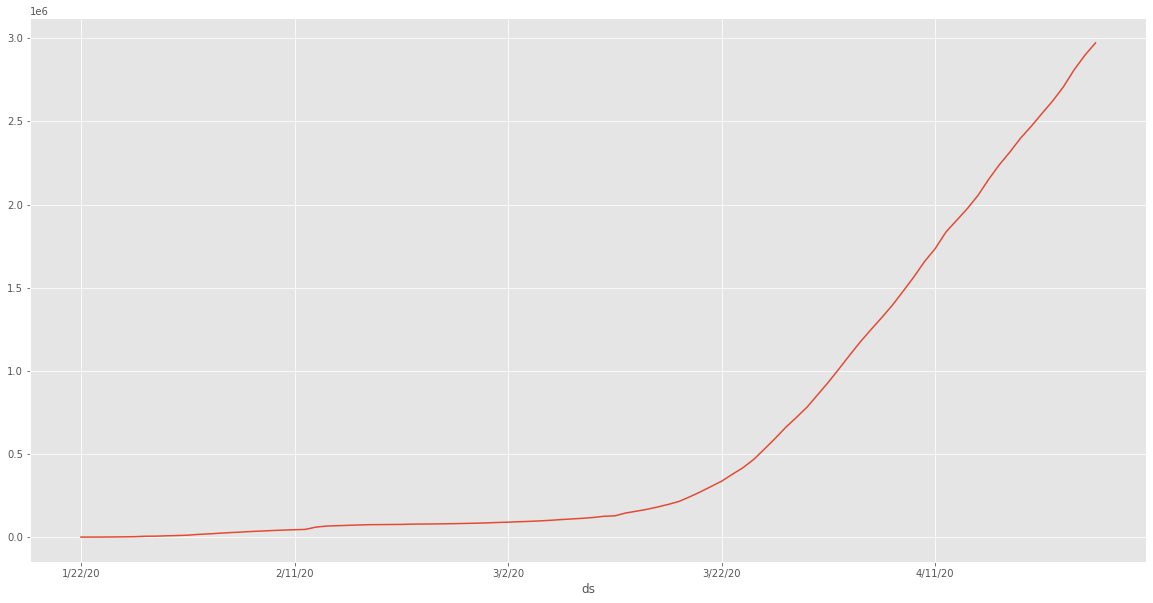

In [202]:

df.set_index('ds').y.plot()

In [203]:
df['y'] = np.log(df['y'])

In [204]:
df.tail()

,index,ds,y
91,91,4/22/20,14.779846
92,92,4/23/20,14.811619
93,93,4/24/20,14.848515
94,94,4/25/20,14.879096
95,95,4/26/20,14.904567


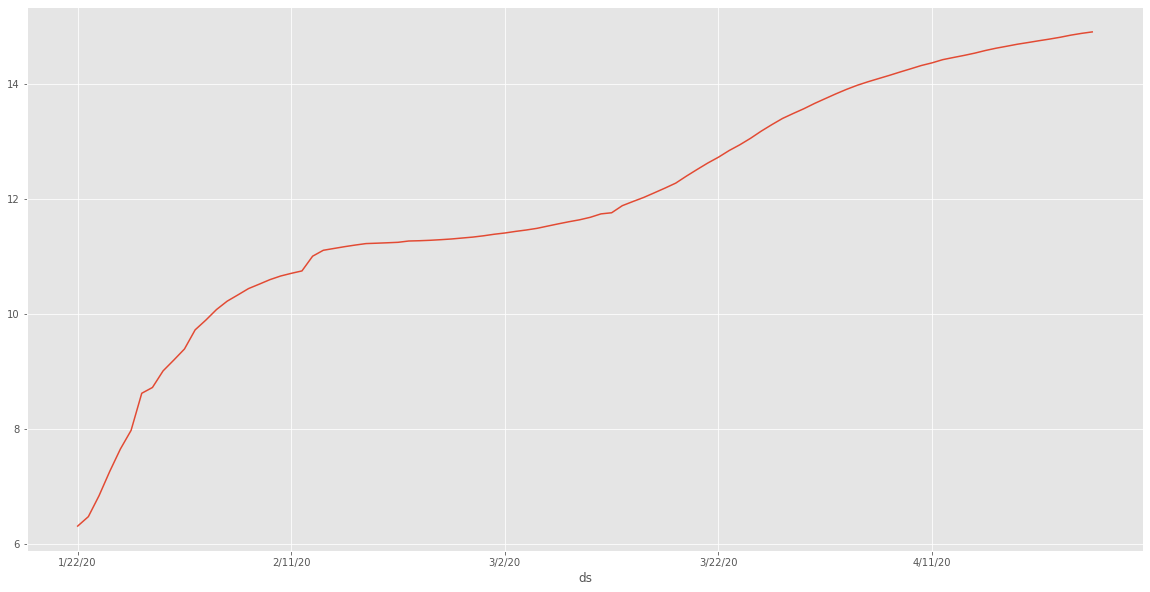

In [205]:
df.set_index('ds').y.plot()

In [206]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [207]:
weekly_seasonality=True

In [208]:

future = model.make_future_dataframe(periods=30, freq = 'd')
future.tail()

,ds
121,2020-05-22
122,2020-05-23
123,2020-05-24
124,2020-05-25
125,2020-05-26


In [209]:
forecast = model.predict(future)

In [210]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
121,2020-05-22,15.998277,14.616450,17.486570,14.615788,17.479081,0.002427,0.002427,0.002427,0.002427,0.002427,0.002427,0.0,0.0,0.0,16.000704
122,2020-05-23,16.038525,14.599033,17.588326,14.578003,17.599648,-0.003591,-0.003591,-0.003591,-0.003591,-0.003591,-0.003591,0.0,0.0,0.0,16.034934
123,2020-05-24,16.078773,14.555520,17.720224,14.544014,17.717338,0.000286,0.000286,0.000286,0.000286,0.000286,0.000286,0.0,0.0,0.0,16.079058
124,2020-05-25,16.119020,14.514193,17.850832,14.530019,17.847050,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,-0.011281,0.0,0.0,0.0,16.107740
125,2020-05-26,16.159268,14.480233,17.987698,14.476330,17.993828,0.008291,0.008291,0.008291,0.008291,0.008291,0.008291,0.0,0.0,0.0,16.167559


In [211]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,2020-05-22,16.000704,14.616450,17.486570
122,2020-05-23,16.034934,14.599033,17.588326
123,2020-05-24,16.079058,14.555520,17.720224
124,2020-05-25,16.107740,14.514193,17.850832
125,2020-05-26,16.167559,14.480233,17.987698


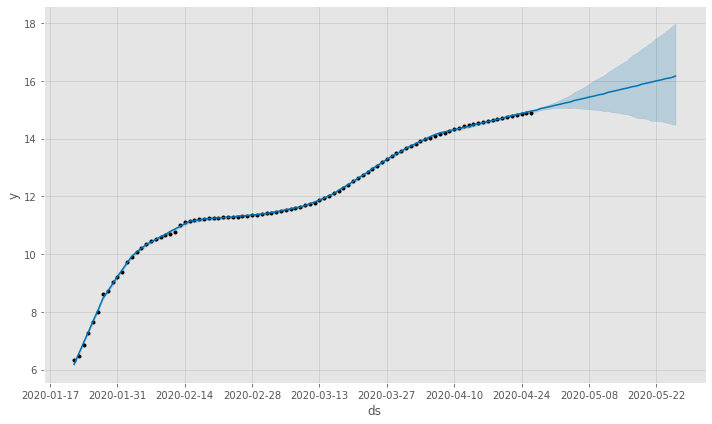

In [212]:
model.plot(forecast);

In [213]:
#df.set_index('ds', inplace=True)
#forecast.set_index('ds', inplace=True)

In [219]:
viz_df = df1.join(forecast[['ds','yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [220]:

viz_df.head()

,Confirmed,ds,yhat,yhat_lower,yhat_upper
0,555.0,2020-01-22,6.178545,6.133119,6.229116
1,654.0,2020-01-23,6.555675,6.509012,6.605857
2,941.0,2020-01-24,6.937819,6.893647,6.985471
3,1434.0,2020-01-25,7.311945,7.262939,7.360587
4,2118.0,2020-01-26,7.696179,7.649783,7.744504


In [221]:

viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [222]:
viz_df.head()

,Confirmed,ds,yhat,yhat_lower,yhat_upper,yhat_rescaled
0,555.0,2020-01-22,6.178545,6.133119,6.229116,482.289616
1,654.0,2020-01-23,6.555675,6.509012,6.605857,703.223734
2,941.0,2020-01-24,6.937819,6.893647,6.985471,1030.519944
3,1434.0,2020-01-25,7.311945,7.262939,7.360587,1498.087773
4,2118.0,2020-01-26,7.696179,7.649783,7.744504,2199.925933


In [224]:
#df.set_index('ds', inplace=True)
viz_df.set_index('ds', inplace=True)

In [226]:
viz_df.head()

,Confirmed,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
2020-01-22,555.0,6.178545,6.133119,6.229116,482.289616
2020-01-23,654.0,6.555675,6.509012,6.605857,703.223734
2020-01-24,941.0,6.937819,6.893647,6.985471,1030.519944
2020-01-25,1434.0,7.311945,7.262939,7.360587,1498.087773
2020-01-26,2118.0,7.696179,7.649783,7.744504,2199.925933


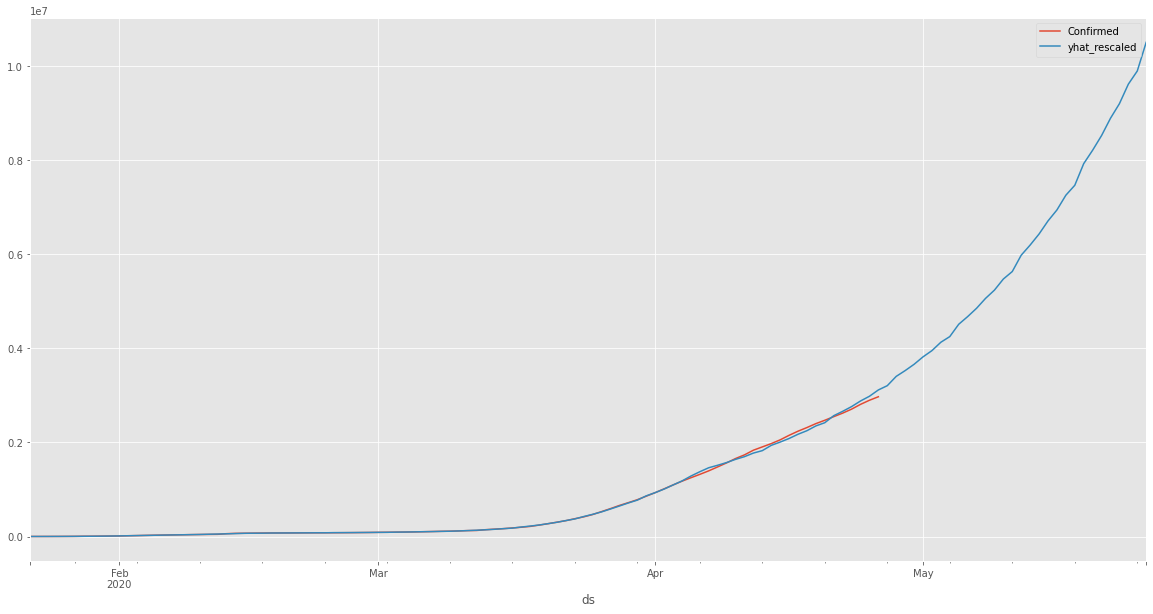

In [227]:
viz_df[['Confirmed', 'yhat_rescaled']].plot()

In [229]:

cases.index = pd.to_datetime(cases.index) #make sure our index as a datetime object
connect_date = cases.index[-2] #select the 2nd to last date

In [230]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

TypeError: '>' not supported between instances of 'int' and 'Timestamp'

ConversionError: Failed to convert value(s) to axis units: array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
       '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20',
       '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20',
       '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20',
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20'],
      dtype=object)

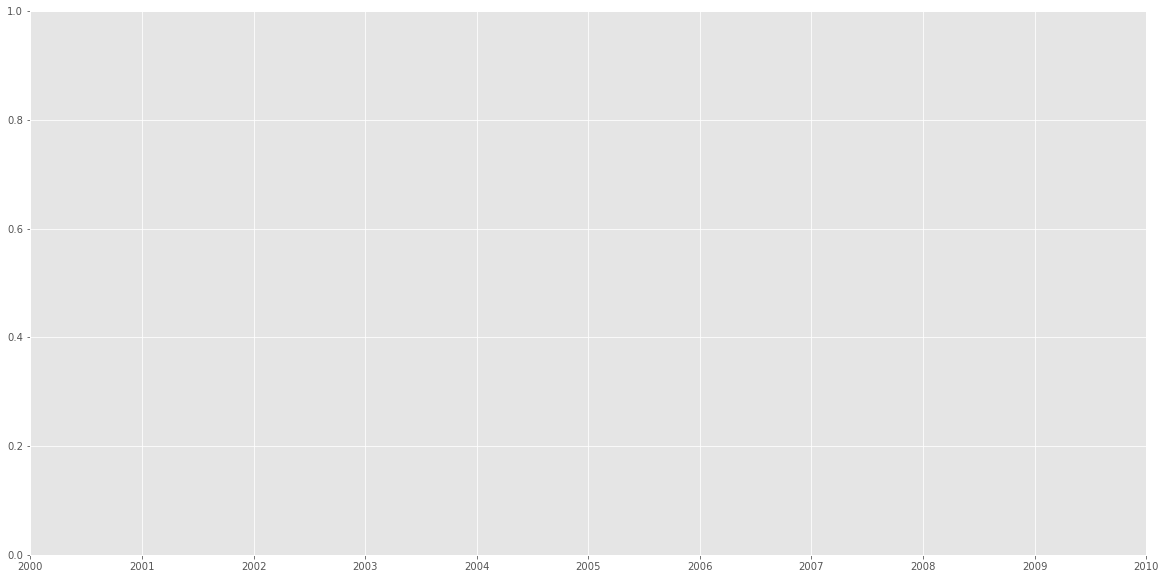

In [233]:
fig, ax1 = plt.subplots()
ax1.plot(cases)
ax1.plot(viz_df, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Cases (Orange) vs Forecast (Black)')
ax1.set_ylabel('Number of cases')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual caseses') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted caseses') #change the legend text for 2nd plot

In [20]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [21]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature_data.csv",parse_dates=['Date'])
pf = data.copy()

In [22]:
pf.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,2020-01-22,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,2020-01-23,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,2020-01-24,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,2020-01-25,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,2020-01-26,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [23]:
unique_dates = pf['Date'].unique()
confirmed_cases = []


for date in unique_dates:
    date_wise = pf['Date'] == date  
    test_data = pf[date_wise]
    
    confirmed_cases.append(test_data['Cumulative_cases'].sum())

    
#Converting the lists to a pandas dataframe.

df = {'Date' : unique_dates, 'Cumulative_cases' : confirmed_cases}
df = pd.DataFrame(df)

In [24]:
df.head()

,Date,Cumulative_cases
0,2020-01-22,554
1,2020-01-23,653
2,2020-01-24,939
3,2020-01-25,1432
4,2020-01-26,2113


In [25]:
df=df.rename(columns={'Date':'ds', 'Cumulative_cases':'y'})

In [26]:
df.head()

,ds,y
0,2020-01-22,554
1,2020-01-23,653
2,2020-01-24,939
3,2020-01-25,1432
4,2020-01-26,2113


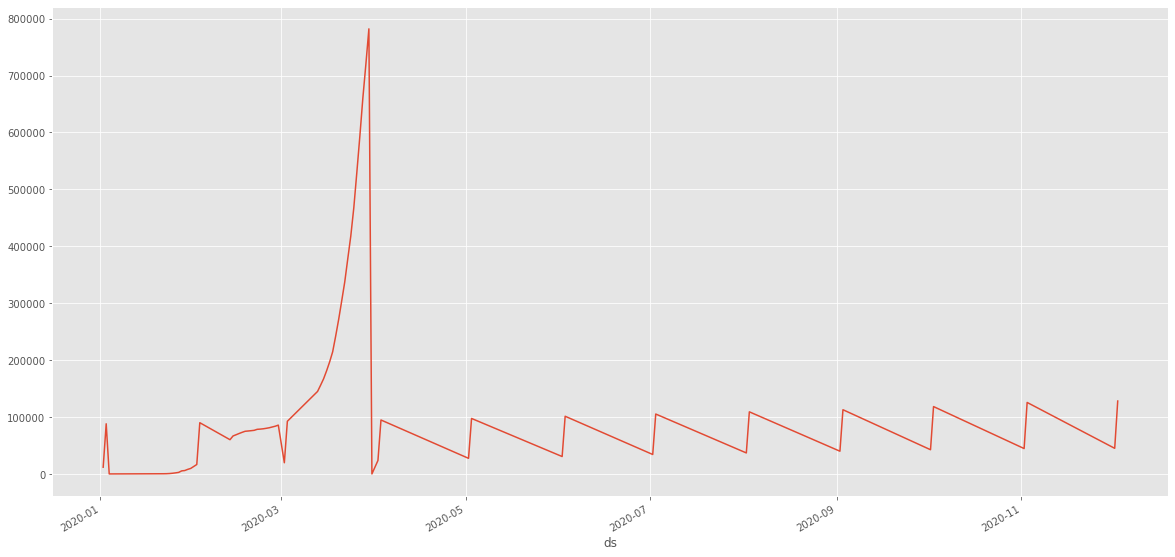

In [27]:
df.set_index('ds').y.plot()

In [28]:
print(df['ds'])

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
        ...    
66   2020-03-28
67   2020-03-29
68   2020-03-30
69   2020-03-31
70   2020-01-04
Name: ds, Length: 71, dtype: datetime64[ns]
